<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

Load the dataset into a dataframe.


In [72]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


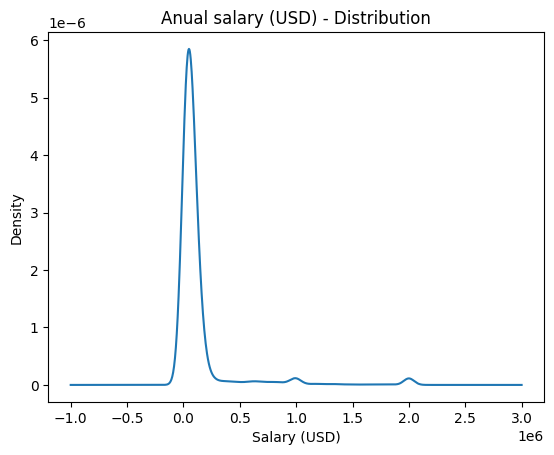

In [73]:
df['ConvertedComp'].plot(kind='density')
plt.title('Anual salary (USD) - Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Density')
plt.show()

Plot the histogram for the column `ConvertedComp`.


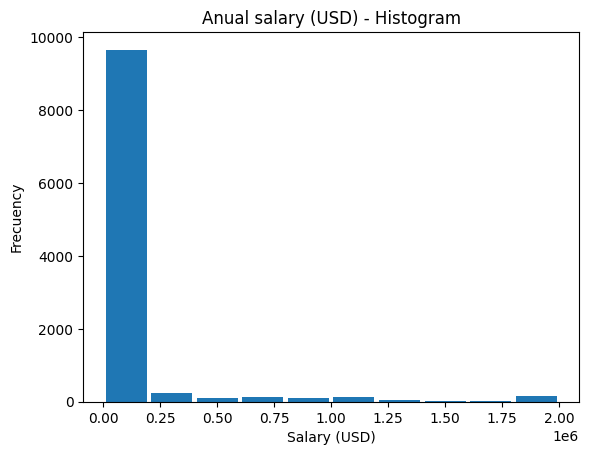

In [74]:
df['ConvertedComp'].plot(kind='hist', rwidth=0.9, bins=10)
plt.title('Anual salary (USD) - Histogram')
plt.xlabel('Salary (USD)')
plt.ylabel('Frecuency')
plt.show()


What is the median of the column `ConvertedComp`?


In [75]:
df['ConvertedComp'].mean()

131596.7316197316

How many responders identified themselves only as a **Man**?


In [76]:
df.groupby('Gender')['Gender'].count()

Gender
Man                                                            10480
Man;Non-binary, genderqueer, or gender non-conforming             26
Non-binary, genderqueer, or gender non-conforming                 63
Woman                                                            731
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Woman;Non-binary, genderqueer, or gender non-conforming           14
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [77]:
df.groupby('Gender')['ConvertedComp'].median()

Gender
Man                                                            57744.0
Man;Non-binary, genderqueer, or gender non-conforming          59520.0
Non-binary, genderqueer, or gender non-conforming              67142.0
Woman                                                          57708.0
Woman;Man                                                      21648.0
Woman;Man;Non-binary, genderqueer, or gender non-conforming    30244.0
Woman;Non-binary, genderqueer, or gender non-conforming        65535.5
Name: ConvertedComp, dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [78]:
M = df['Age'].max()
m = df['Age'].min()
med = df['Age'].median()
first = df['Age'].quantile([0.25, 0.5, 0.75])
print('Edad máxima = ', M)
print('Edad mínima = ', m)
print('Edad promedio = ', med)
print('Cuartiles : ')
print(first)

Edad máxima =  99.0
Edad mínima =  16.0
Edad promedio =  29.0
Cuartiles : 
0.25    25.0
0.50    29.0
0.75    35.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


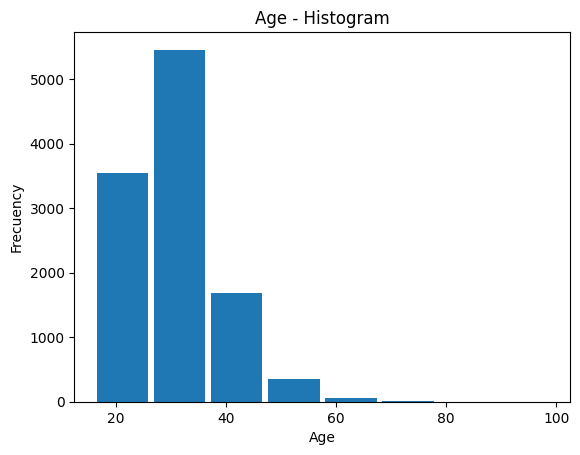

In [79]:
df['Age'].plot(kind='hist', rwidth=0.9, bins=8)
plt.title('Age - Histogram')
plt.xlabel('Age')
plt.ylabel('Frecuency')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


In [83]:
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [87]:
#Tukey’s rule

Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['ConvertedComp'] >= Q1 - 1.5 * IQR) & (df['ConvertedComp'] <= Q3 + 1.5 *IQR)
df.loc[filter]

print('1st = ', Q1)
print('3rd = ', Q3)
print('Interquantile range = ', IQR)

1st =  26868.0
3rd =  100000.0
Interquantile range =  73132.0


In [88]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
outliers = df.loc[(df['ConvertedComp'] < Q1 - 1.5*IQR) | (df['ConvertedComp'] > Q3 + 1.5*IQR)]


print('1st = ', Q1)
print('3rd = ', Q3)
print('Interquantile range = ', IQR)

1st =  26868.0
3rd =  100000.0
Interquantile range =  73132.0


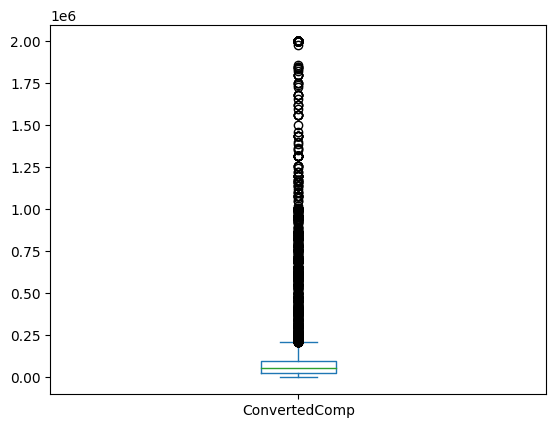

In [80]:
df['ConvertedComp'].plot(kind='box')

plt.show()


In [81]:
df1= df[(df['ConvertedComp'] > (Q1 - 1.5 * IQR)) & (df['ConvertedComp'] < (Q3 + 1.5 * IQR))]

df1['ConvertedComp'].median() 

52704.0

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [82]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

#filter = (df['ConvertedComp'] >= Q1 - 1.5 * IQR) & (df['ConvertedComp'] <= Q3 + 1.5 *IQR)
#df.loc[filter]

print('1st = ', Q1)
print('3rd = ', Q3)
print('Interquantile range = ', IQR)

1st =  26868.0
3rd =  100000.0
Interquantile range =  73132.0


Find out the upper and lower bounds.


In [69]:
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR
print('Upper bound = ', upper_bound)
print('Lower bound = ', lower_bound)

Upper bound =  209698.0
Lower bound =  -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [56]:
num_outliers = len(df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)])
print(num_outliers)

0


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [ ]:
# your code goes here


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [ ]:
# your code goes here


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
